# Implementation: Linear Regression

## 1. Working with scikit-learn

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Beforehand, we mimic a dataset with given functions provided:

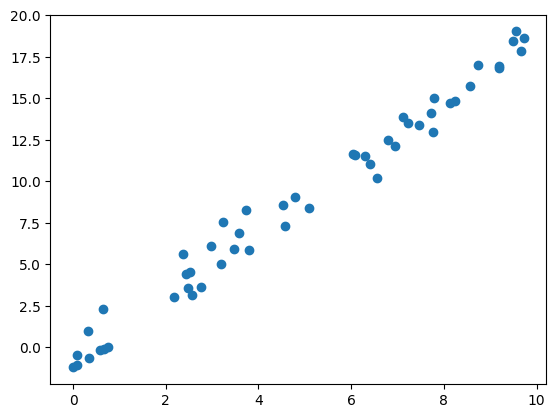

In [2]:
rng = np.random.RandomState(13)
x = 10 * rng.rand(50)          # generate a random array as regressors
y = 2 * x - 1 + rng.randn(50)  # generate corresponding noised response
plt.scatter(x, y)

First we choose the panel for possible models:

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

Then we fit the data into one model:

In [5]:
X = x[:, np.newaxis] # transform the array x into a column vector
X.shape

(50, 1)

In [6]:
model.fit(X, y)

LinearRegression()

In [7]:
model.coef_, model.intercept_

(array([1.94416137]), -0.6969350868570121)

Finally we plot out the prediction with real data:

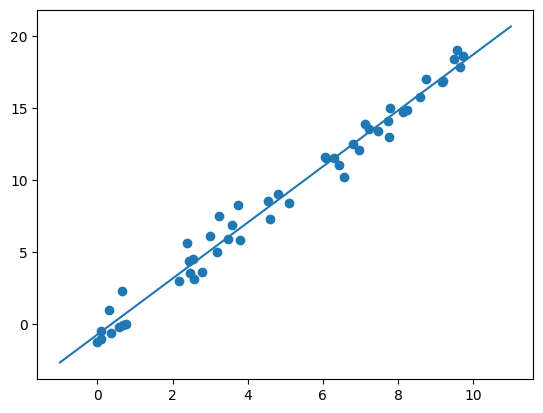

In [8]:
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)
plt.scatter(x, y)
plt.plot(xfit, yfit);

## 2. Working with pure LMS algorithms

First we initialize a base class to restore bias and weights:

In [9]:
class RegressionBase(object):
    def __init__(self):
        self.bias = None
        self.weights = None

We inherihent from the base to implement the LR class:

In [ ]:
class LinearRegression(RegressionBase):
    def __init__(self):
        super().__init__()

    def _predict(self, Xi):
        """Returns the prediction value for input Xi"""
        return sum(wi * xij for wi, xij in zip(self.weights, Xi)) + self.bias

    def _get_gradient_delta(self, Xi, yi):
        """Calculates the gradient delta for a given input Xi and target yi"""
        y_hat = self._predict(Xi)
        bias_grad_delta = yi - y_hat
        weights_grad_delta = [bias_grad_delta * Xij for Xij in Xi]
        return bias_grad_delta, weights_grad_delta

    def _batch_gradient_descent(self, X, y, lr, epochs):
        """Performs batch gradient descent optimization"""
        m, n = len(X), len(X[0])
        self.bias = 0
        self.weights = [normalvariate(0, 0.01) for _ in range(n)]

        for _ in range(epochs):
            bias_grad = 0
            weights_grad = [0 for _ in range(n)]

            for i in range(m):
                bias_grad_delta, weights_grad_delta = self._get_gradient_delta(X[i], y[i])
                bias_grad += bias_grad_delta
                weights_grad = [w_grad + w_grad_d for w_grad, w_grad_d in zip(weights_grad, weights_grad_delta)]

            self.bias += lr * bias_grad * 2 / m
            self.weights = [w + lr * w_grad * 2 / m for w, w_grad in zip(self.weights, weights_grad)]

    def _stochastic_gradient_descent(self, X, y, lr, epochs, sample_rate):
        """Performs stochastic gradient descent optimization"""
        m, n = len(X), len(X[0])
        k = int(m * sample_rate)
        self.bias = 0
        self.weights = [normalvariate(0, 0.01) for _ in range(n)]

        for _ in range(epochs):
            for i in sample(range(m), k):
                bias_grad, weights_grad = self._get_gradient_delta(X[i], y[i])
                self.bias += lr * bias_grad
                self.weights = [w + lr * w_grad for w, w_grad in zip(self.weights, weights_grad)]

    def fit(self, X, y, lr, epochs, method="batch", sample_rate=1.0):
        """Fits the regression model based on the specified method (batch or stochastic)"""
        assert method in ("batch", "stochastic")
        if method == "batch":
            self._batch_gradient_descent(X, y, lr, epochs)
        if method == "stochastic":
            self._stochastic_gradient_descent(X, y, lr, epochs, sample_rate)

    def predict(self, X):
        """Predicts the output for input X"""
        return [self._predict(xi) for xi in X]



Finally we self-test our implementation: